<p><img style="float: right;margin:5px 80px 5px 1px; max-width:150px" src="https://upload.wikimedia.org/wikipedia/commons/e/e1/Logo_of_YouTube_%282015-2017%29.svg">
<img style="float: left;margin:5px 80px 5px 1px; max-width:150px" src="https://upload.wikimedia.org/wikipedia/commons/2/26/Spotify_logo_with_text.svg"></p>
<p style="text-align:center; font-size: 18px; font-weight: bold">Keşifçi Veri Analizi (Exploratory Data Analysis - EDA)</p>
<br/>

In [1]:
#Kütüphaneler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Dosyayı okutma
data = pd.read_csv("C://Python//Spotify_Youtube.csv")

In [3]:
# Orjinal veri setini korumak için kopya
df = data.copy()

In [4]:
# Satır ve Sütun sayısı
df.shape

(20718, 28)

In [5]:
# Veri setinin ilk beş satırını görüntüleme
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [6]:
# Veri setinin som beş satırını görüntüleme
df.tail()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0
20717,20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,0.498,0.938,6.0,...,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


In [7]:
#Sütun indeksi ile liste halinde görüntüleme
for i, col in enumerate (df.columns):
    print(str(i+1)+ ". " + col)

1. Unnamed: 0
2. Artist
3. Url_spotify
4. Track
5. Album
6. Album_type
7. Uri
8. Danceability
9. Energy
10. Key
11. Loudness
12. Speechiness
13. Acousticness
14. Instrumentalness
15. Liveness
16. Valence
17. Tempo
18. Duration_ms
19. Url_youtube
20. Title
21. Channel
22. Views
23. Likes
24. Comments
25. Description
26. Licensed
27. official_video
28. Stream


In [8]:
#URL leri sütun bazlı DataFrame'den çıkarma
url_cols = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df.drop(url_cols, axis=1, inplace=True)

In [9]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [10]:
#Genel Bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Channel           20248 non-null  object 
 16  Views             20248 non-null  float6

In [11]:
#Eksik Değer Sayısı
df.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64

In [12]:
#Eksikleri çıkarma
df.dropna(inplace=True)

In [13]:
#Yinelenenler
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Artist, Track, Album, Album_type, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Channel, Views, Likes, Comments, Licensed, official_video, Stream]
Index: []

[0 rows x 22 columns]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19549 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Liveness          19549 non-null  float64
 12  Valence           19549 non-null  float64
 13  Tempo             19549 non-null  float64
 14  Duration_ms       19549 non-null  float64
 15  Channel           19549 non-null  object 
 16  Views             19549 non-null  float64
 17

In [15]:
df.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [16]:
#İstatistiksel Özet
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04
mean,0.621059,0.635170,5.294337,-7.633179,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,9.545626e+07,6.700487e+05,2.786371e+04,1.371101e+08
std,0.165489,0.213555,3.579338,4.618839,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,2.775744e+08,1.805054e+06,1.959074e+05,2.463589e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.519000,0.508000,2.000000,-8.772000,0.035700,0.044400,0.000000,0.094000,0.339000,96.990000,1.802400e+05,1.911528e+06,2.238000e+04,5.310000e+02,1.781089e+07
50%,0.639000,0.666000,5.000000,-6.516000,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.491440e+07,1.279090e+05,3.343000e+03,4.979139e+07
75%,0.742000,0.797000,8.000000,-4.929000,0.104000,0.470000,0.000433,0.234000,0.725000,139.951000,2.519200e+05,7.152989e+07,5.266400e+05,1.449300e+04,1.390828e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


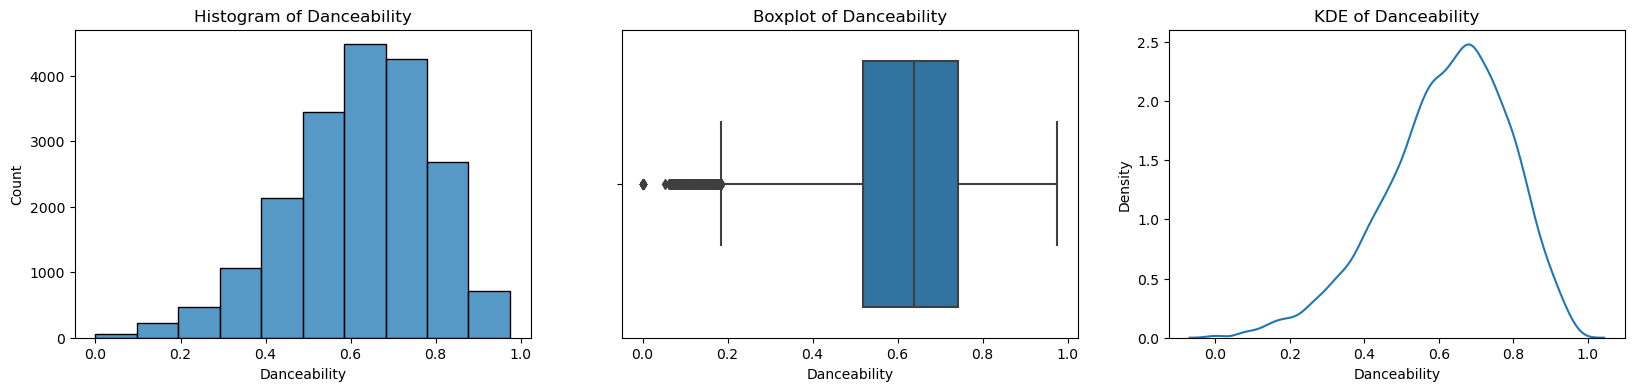

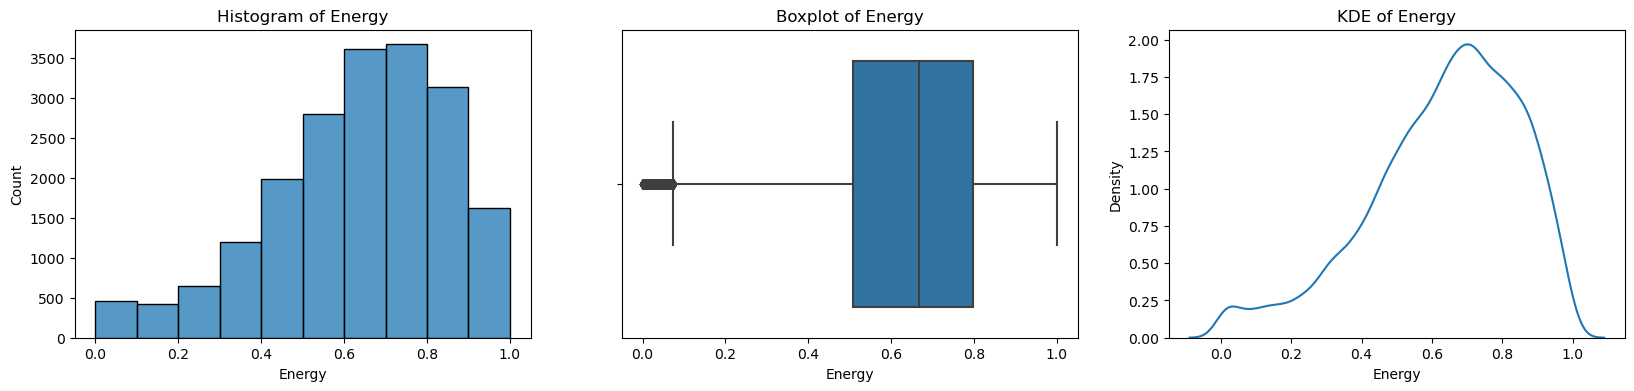

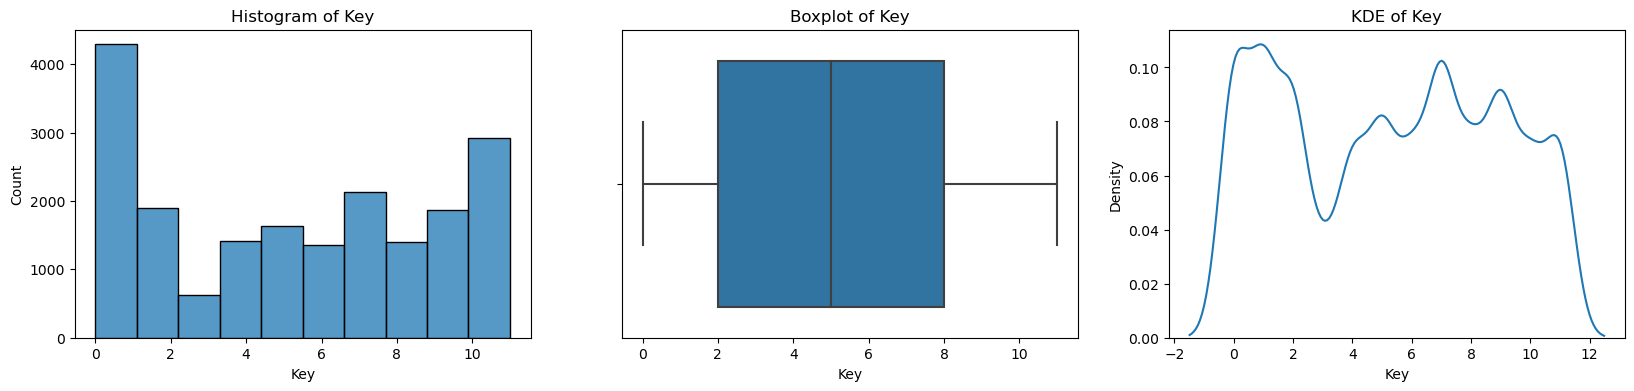

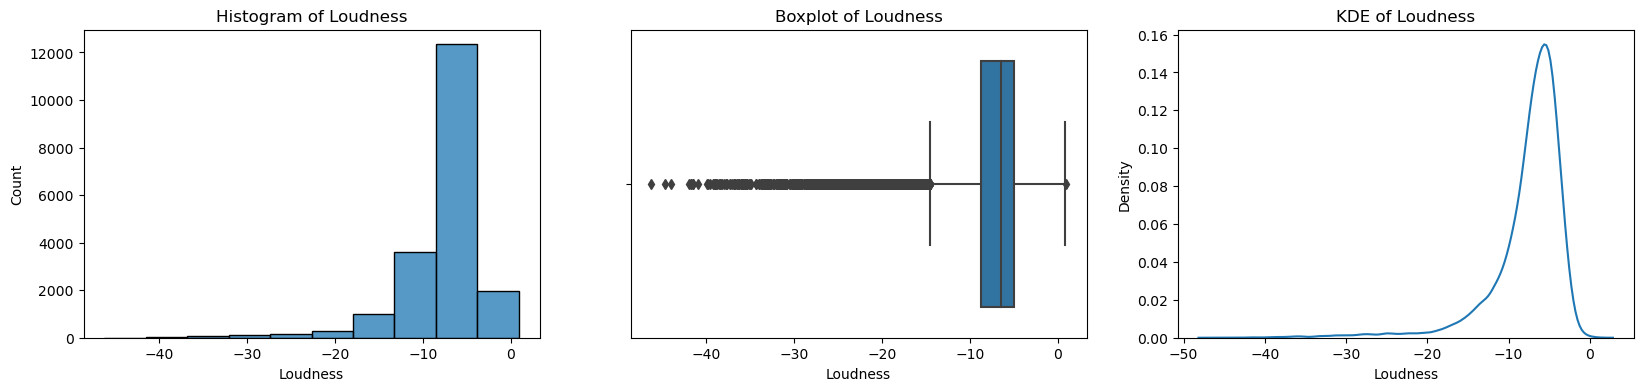

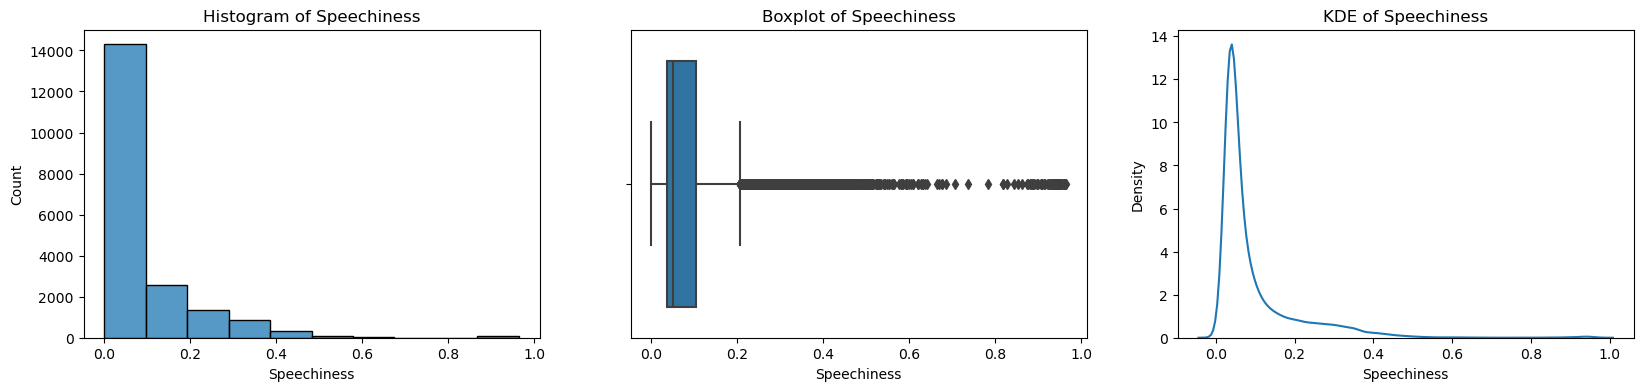

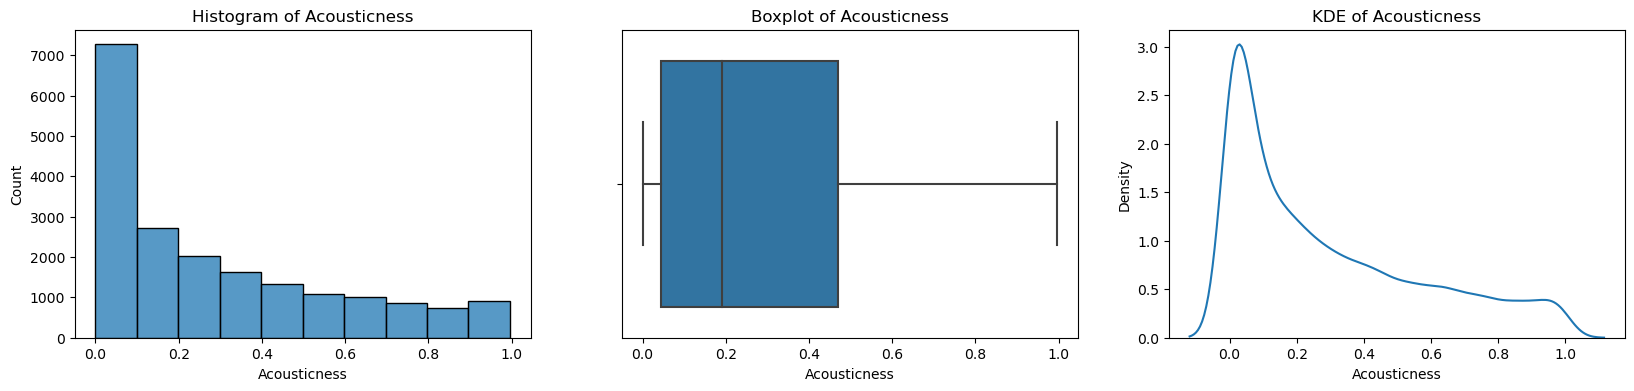

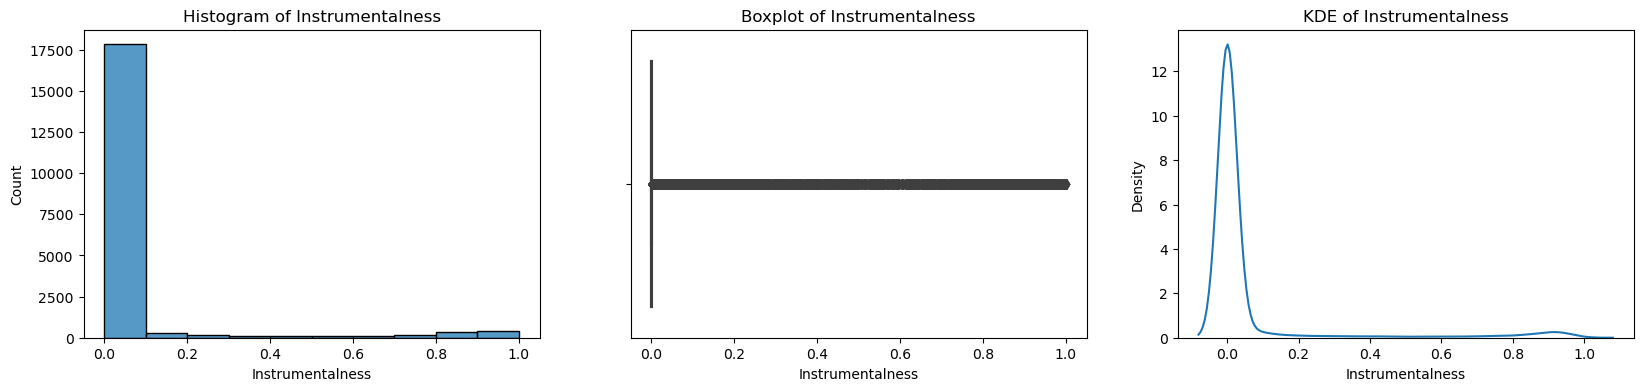

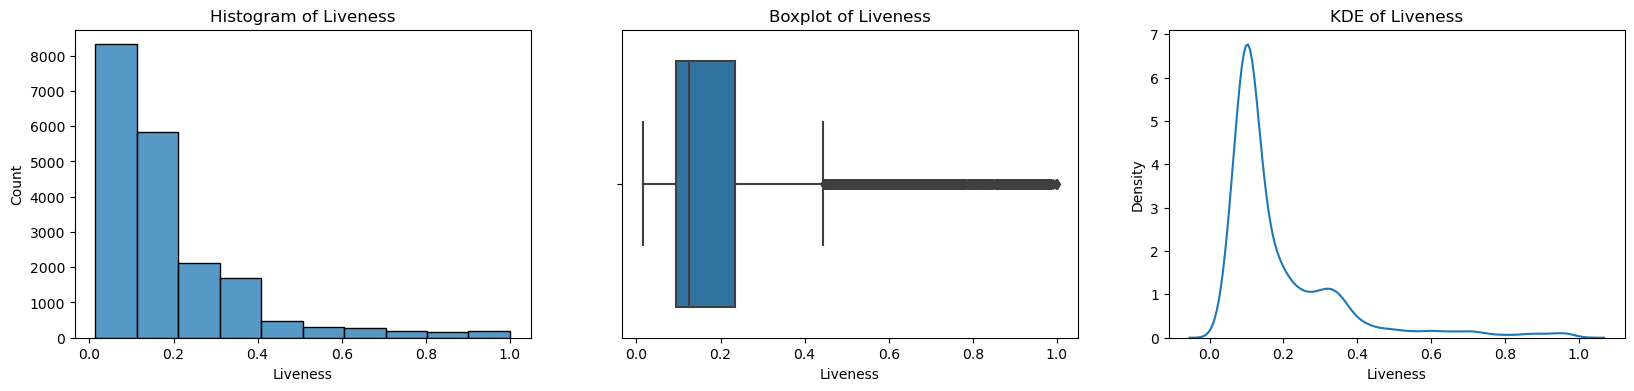

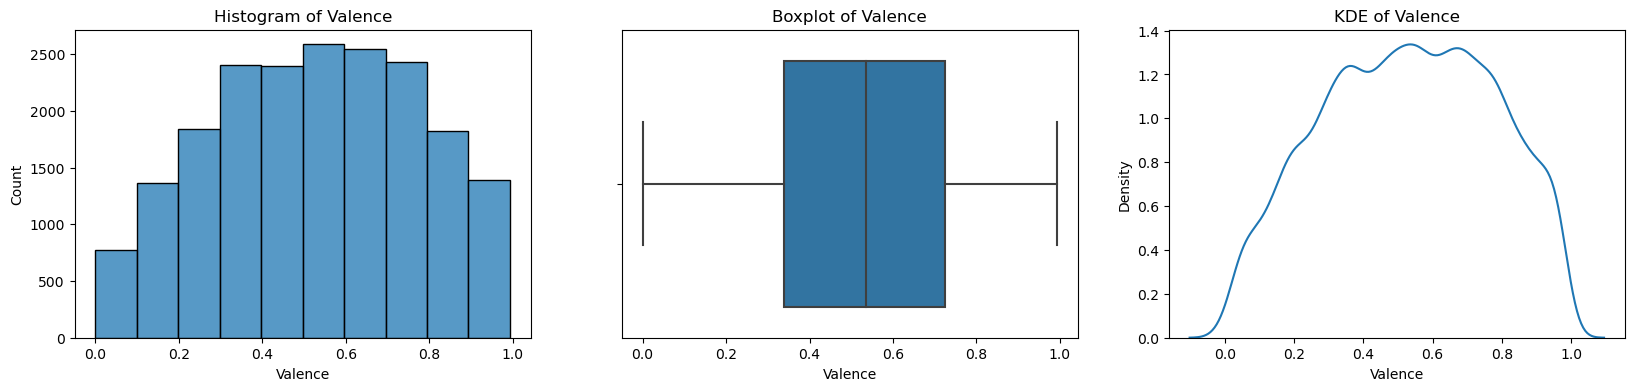

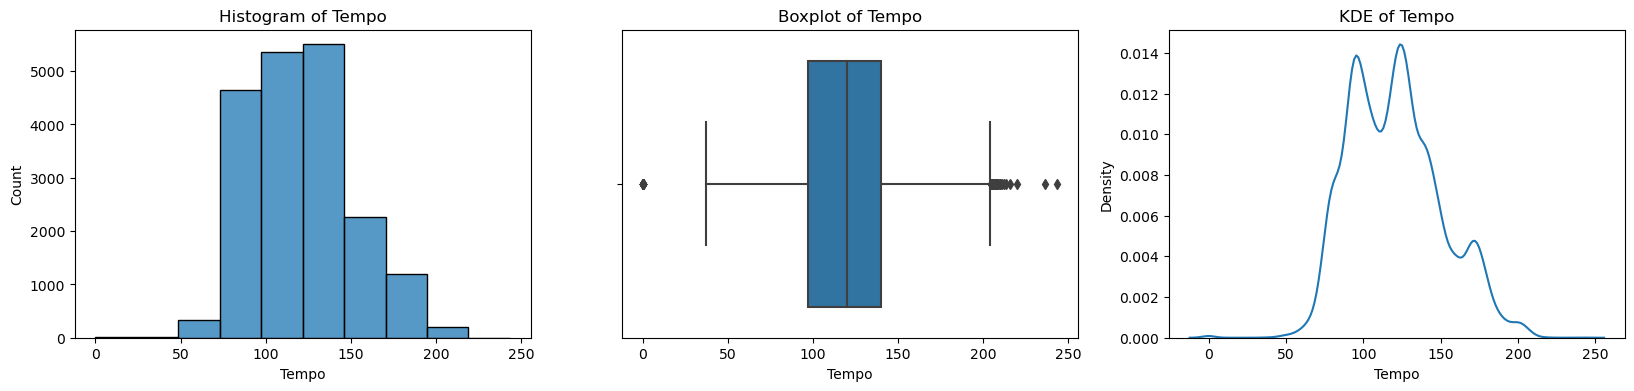

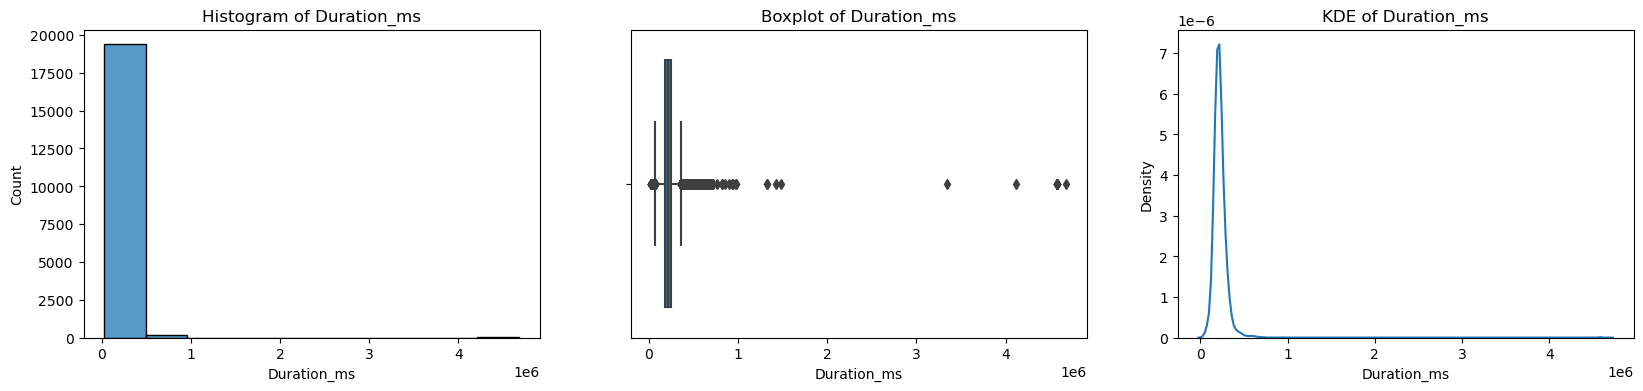

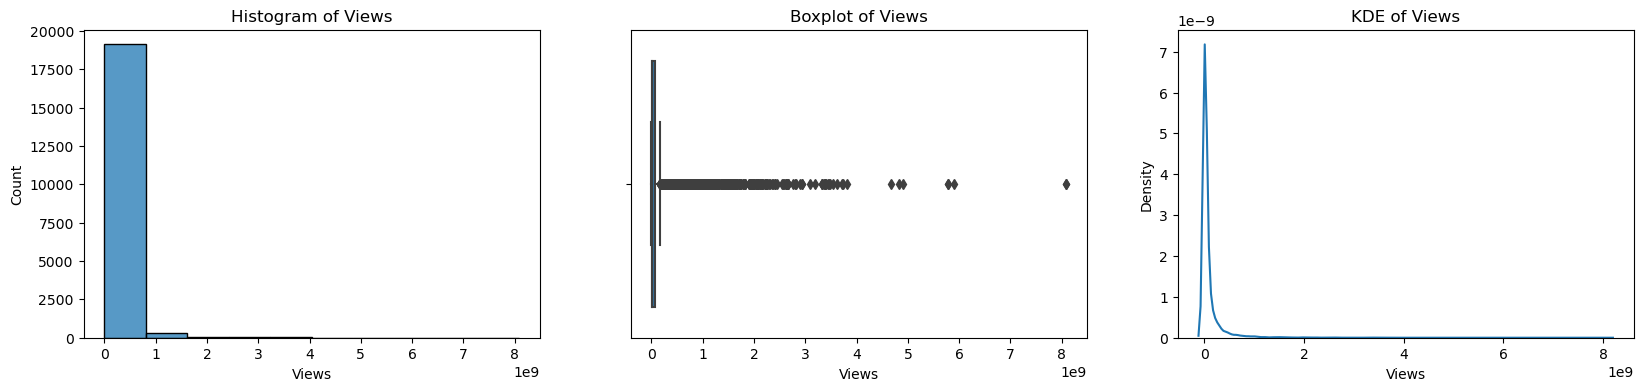

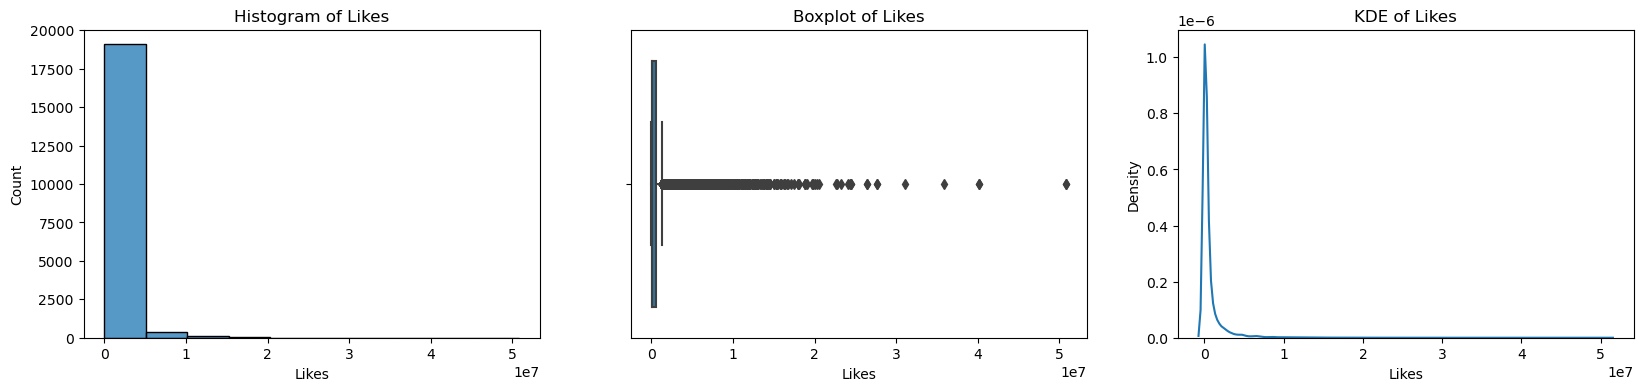

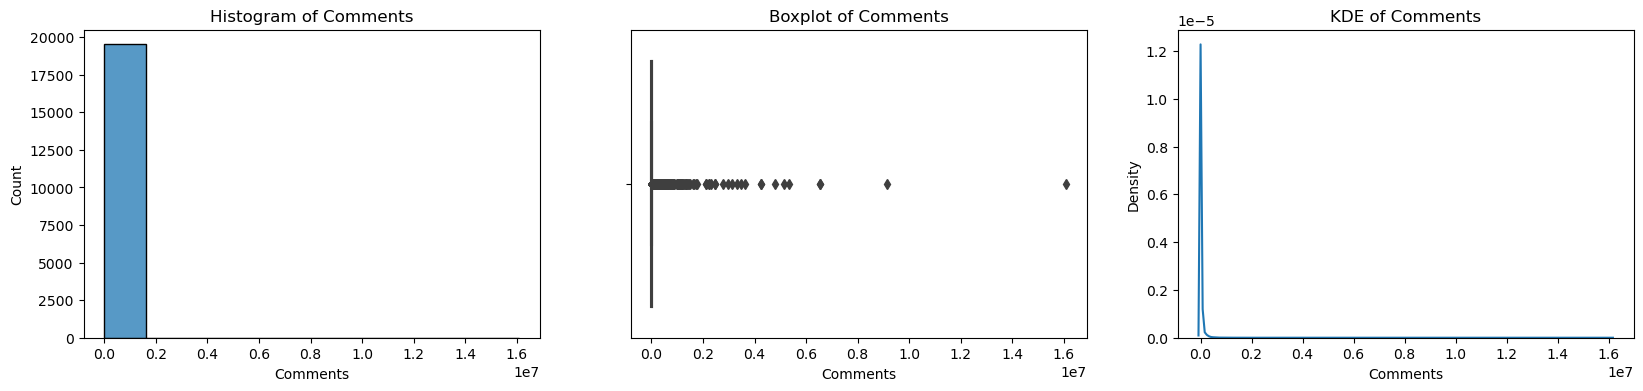

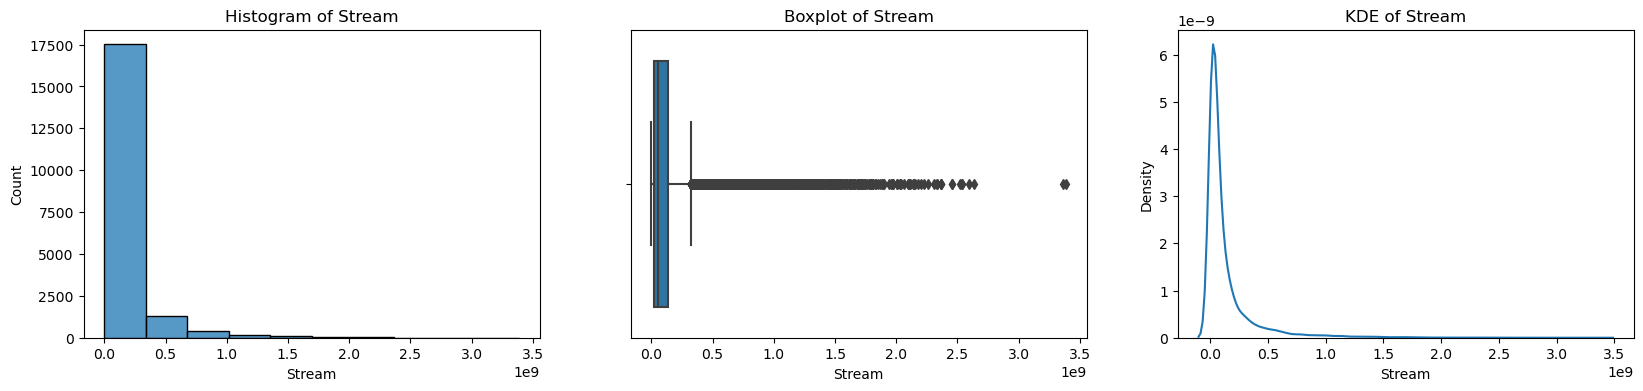

In [17]:
#Veri Setindeki sayısal değerlerin grafikleri
def sayisal_grafikler(data):
    numeric_columns = [col for col in data.columns if data[col].dtype != "O"]
    
    for i in numeric_columns:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
        
        sns.histplot(x=data[i], bins=10, ax=axes[0])
        axes[0].set_title(f'Histogram of {i}')
        
        sns.boxplot(x=data[i], ax=axes[1])
        axes[1].set_title(f'Boxplot of {i}')
        
        sns.kdeplot(x=data[i], ax=axes[2])
        axes[2].set_title(f'KDE of {i}')
        
        plt.show()

sayisal_grafikler(df)


##### Verinin dağılımı, olası uç değerler ve yoğunluk hakkında görsel bilgiler elde etmek için.

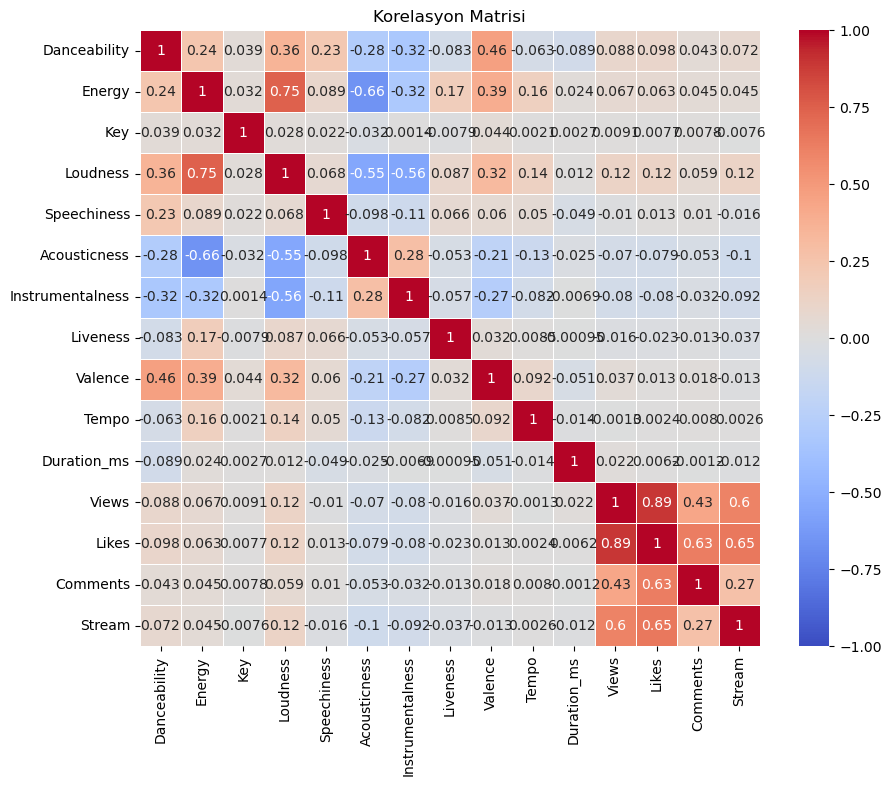

In [18]:
#Veri Setindeki sayısal değerlerin korelasyonları

correlation_matrix = df.corr(numeric_only=True)

# Heatmap ile korelasyon matrisi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasyon Matrisi')
plt.show()

In [19]:
#Tüm Albüm Türlerinin Dağılımı
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

Album_type
album          14148
single          4689
compilation      712
Name: count, dtype: int64


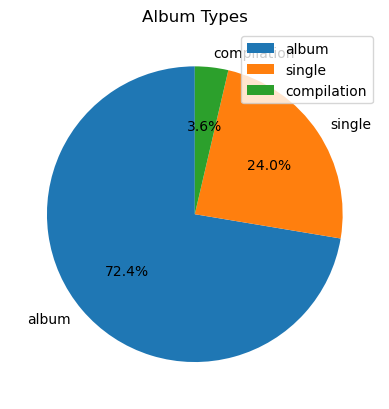

In [20]:
# Albüm Türlerinin Yüzdesel Dağılımı
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

In [21]:
# En Yüksek Toplam Görüntülenme ve Akışa Sahip İlk 20 Sanatçı

artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)
top_20 = artist_sorted.head(20)
print(top_20)

                                Views        Stream
Artist                                             
Ed Sheeran               1.546021e+10  1.439488e+10
CoComelon                1.460167e+10  3.690822e+08
Katy Perry               1.312063e+10  6.607329e+09
Charlie Puth             1.216759e+10  7.041187e+09
Luis Fonsi               1.162811e+10  5.054326e+09
Justin Bieber            1.099106e+10  1.209777e+10
Daddy Yankee             1.087193e+10  5.135462e+09
Bruno Mars               1.024092e+10  1.089786e+10
Macklemore & Ryan Lewis  1.012206e+10  3.982978e+09
Coldplay                 9.997278e+09  1.177848e+10
Calvin Harris            9.758476e+09  9.548542e+09
BLACKPINK                9.392962e+09  4.015972e+09
DJ Snake                 9.180268e+09  7.739463e+09
Eminem                   9.119324e+09  9.748588e+09
Imagine Dragons          9.093785e+09  1.185831e+10
Enrique Iglesias         8.860271e+09  3.732862e+09
Shakira                  8.818140e+09  4.295045e+09
Fifth Harmon

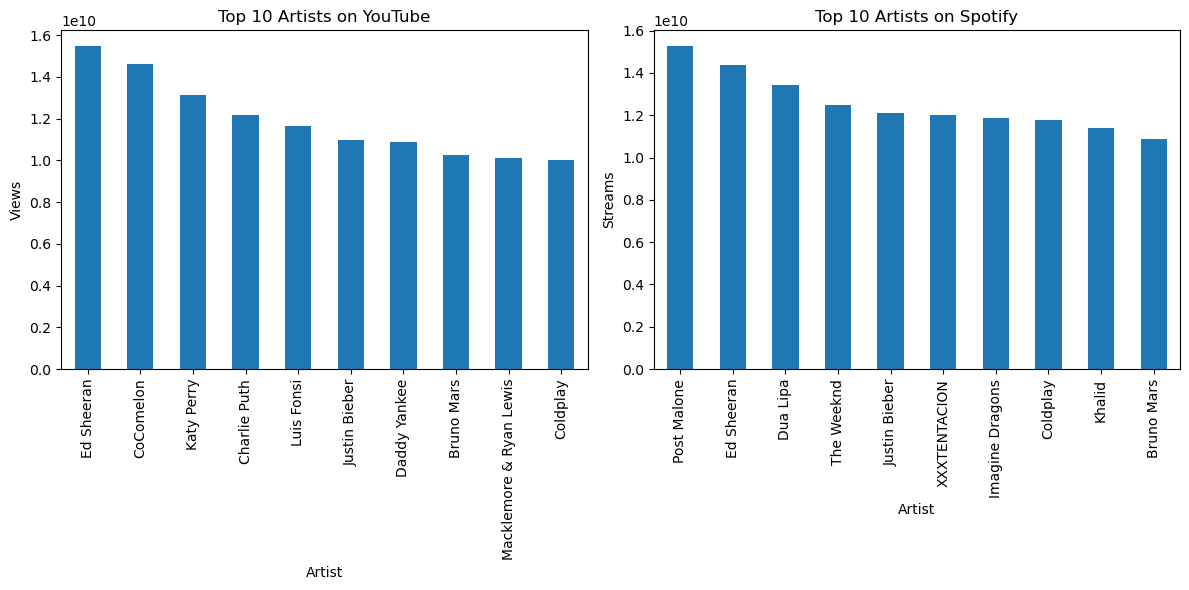

In [22]:
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# top 10 youtube
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# top 10 spotify
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)


ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

**Ed Sheeran, Youtube'da 15 milyar izlenme ile en çok izlenen sanatçı. CoComelon ve Katy Perry sırasıyla 14 milyar ve 13 milyar izlenme ile ikinci ve üçüncü en çok izlenen sanatçılardır. Charlie Puth ve Luis Fonsi sırasıyla 12 milyar ve 11 milyar izlenmeyle ilk beşte yer alıyor.**

**Spotify'da ise Malone 15 milyar ile en çok dinlenen sanatçı. Sırada Ed Shreeran yaklaşık 14 milyar dinlenme var. Dua Lipa ve The Weekend sırasıyla 13,5 milyar ve 13 milyar ile en çok dinlenen üçüncü ve dördüncü sanatçılar. Justin Bieber 13 milyar dinlenmeyle beşinci sırada yer alıyor.**

In [23]:
# En Popüler Görüntüleme İlk 10
top10_views = df.nlargest(10, 'Views')

# En Popüler Yorum İlk 10
top10_comments = df.nlargest(10, 'Comments')

# En Popüler Beğeni İlk 10
top10_likes = df.nlargest(10, 'Likes')

C:\Users\Emrah\AppData\Local\Temp\ipykernel_7612\797865488.py:15: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.tight_layout()
C:\Users\Emrah\AppData\Local\Temp\ipykernel_7612\797865488.py:15: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.tight_layout()
C:\Users\Emrah\AppData\Local\Temp\ipykernel_7612\797865488.py:15: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.tight_layout()
C:\Users\Emrah\AppData\Local\Temp\ipykernel_7612\797865488.py:15: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.tight_layout()
C:\Users\Emrah\AppData\Local\Temp\ipykernel_7612\797865488.py:15: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.tight_layout()
C:\Users\Emrah\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_fig

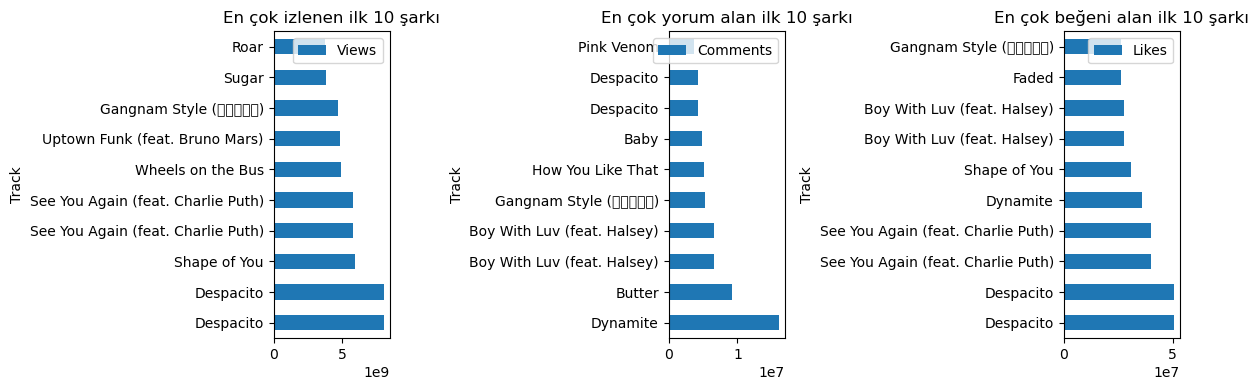

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# En Popüler Görüntüleme İlk 10
top10_views.plot(kind='barh', x='Track', y='Views', ax=axs[0])
axs[0].set_title('En çok izlenen ilk 10 şarkı')

# En Popüler Yorum İlk 10
top10_comments.plot(kind='barh', x='Track', y='Comments', ax=axs[1])
axs[1].set_title('En çok yorum alan ilk 10 şarkı')

# En Popüler Beğeni İlk 10
top10_likes.plot(kind='barh', x='Track', y='Likes', ax=axs[2])
axs[2].set_title('En çok beğeni alan ilk 10 şarkı')

fig.tight_layout()

plt.show()

In [25]:
#En Popüler Olan Şarkılar (ilk 10)
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]

,Track,Energy,Danceability,Acousticness
15250,Blinding Lights,0.730,0.514,0.00146
12452,Shape of You,0.652,0.825,0.58100
19186,Someone You Loved,0.405,0.501,0.75100
17937,rockstar (feat. 21 Savage),0.520,0.585,0.12400
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
13503,One Dance,0.625,0.792,0.00776
16028,Closer,0.524,0.748,0.41400
16099,Closer,0.524,0.748,0.41400
14030,Believer,0.780,0.776,0.06220


C:\Users\Emrah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


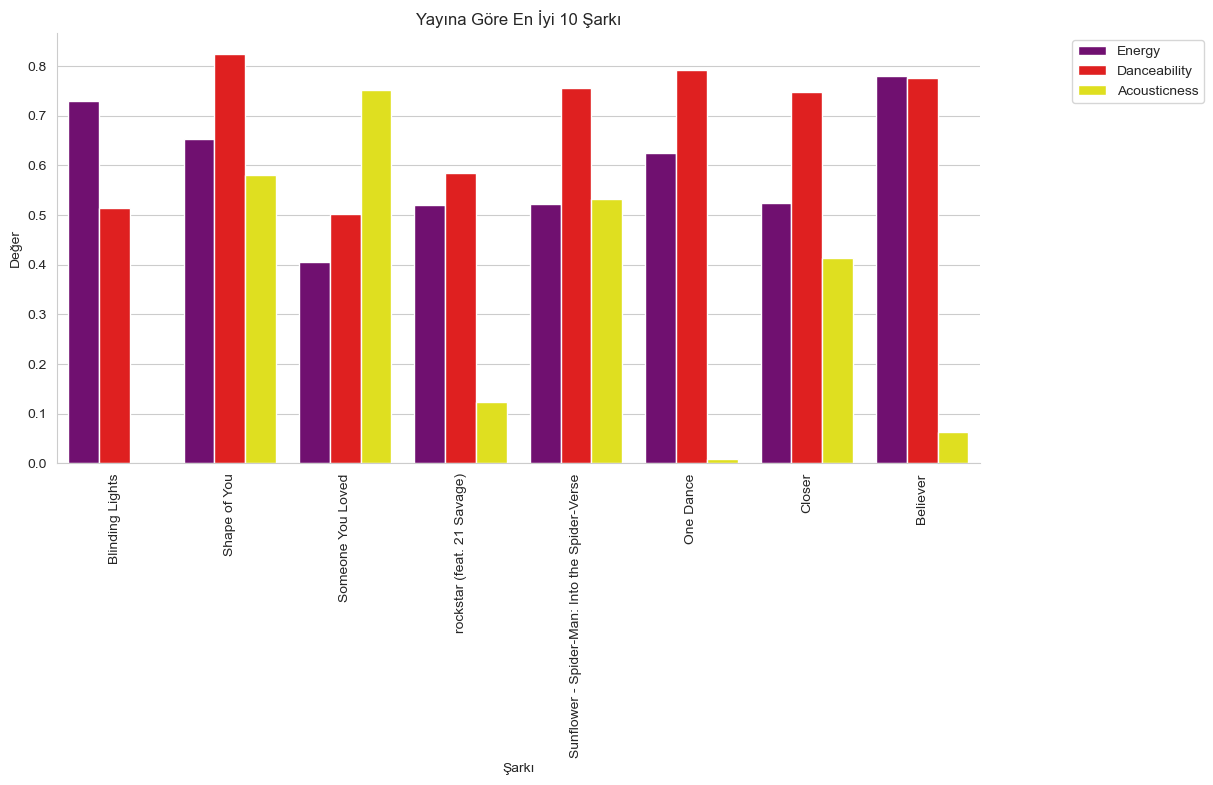

In [36]:
#En Popüler Olan Şarkıların Özellik Karışılaştırılması
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'purple', 'Danceability': 'red', 'Acousticness': 'yellow'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Yayına Göre En İyi 10 Şarkı')
plt.xlabel('Şarkı')
plt.ylabel('Değer')

plt.xticks(rotation=90)
plt.show()

**Dans ritimleri ve enerjisi yüksek şarkılar insanlar arasında daha popüler.**

In [34]:
# index i Şarkıcı Olan DataFrame
df_artist = df.set_index("Artist")
df_artist = df_artist[["Danceability","Views","Likes","Album_type"]]

In [35]:
df_artist.head()

,Danceability,Views,Likes,Album_type
Artist,,,,
Gorillaz,0.818,693555221.0,6220896.0,album
Gorillaz,0.676,72011645.0,1079128.0,album
Gorillaz,0.695,8435055.0,282142.0,single
Gorillaz,0.689,211754952.0,1788577.0,album
Gorillaz,0.663,618480958.0,6197318.0,album


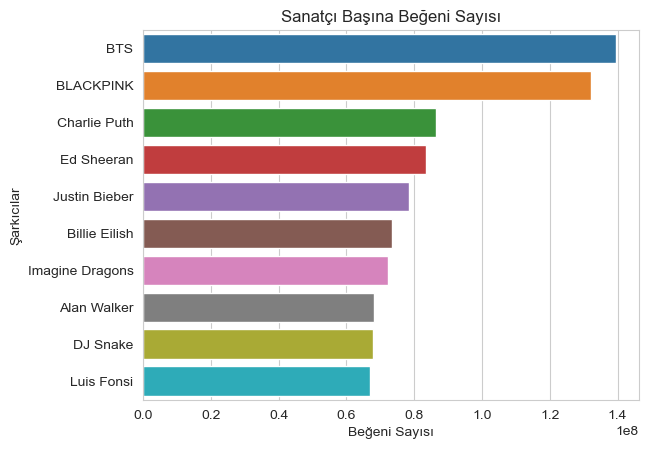

In [29]:
# Sanatçılara göre ortalama dans edilebilirlik puanı
df_artist_grouped = df_artist.groupby('Artist')['Likes'].sum().reset_index()

# Dans edilebilirliği azalan sıraya göre sıralama
df_artist_sorted = df_artist_grouped.sort_values(by='Likes', ascending=False)

# En Yüksek Dans Edilebilirlik Puanına Sahip Olan İlk 10 Sanatçı
top_10_artists = df_artist_sorted.head(10)

sns.barplot(x='Likes', y='Artist', data=top_10_artists)

plt.xlabel('Beğeni Sayısı')
plt.ylabel('Şarkıcılar')
plt.title('Sanatçı Başına Beğeni Sayısı')

plt.show()

**Sanatçı Başına Beğeni Sayısı En Fazla olan Sanatçılar BTS ve BLACKPINK**

## Bulgular <a class="anchor" id="bulgular"></a>

#### Boş değerler tespit edildi ve çözüldü
#### Kopya veri kontrolü yapıldı
#### Numerik değişkenler için  keşifsel veri analiz yapıldı dağılımı incelendi
#### Görüntülenme ve Beğeni Arasında Pozitif Bir İlişki Belirlendi.
#### Albüm Türlerinin yüzdesi incelendi
#### Youtube ve Spotify daki Top 10 Sanatçı Dağılımı incelendi